<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Notebook Roadmap</h3>

* Data Overview
* Exploratory Data Analysis
* Univariate Analysis
* Bivariate Analysis
* Models Development
* Models Evaluation
* models Interpretation
* Insights & Recommendations

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Overview</h3>

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Import Libraries & Load Data</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [3]:
customers = pd.read_csv(r"C:\Users\user\Downloads\Ecommerce Customers.csv")

<a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1>

In [4]:
print(f'No. of records are {customers.shape[0]}')
print(f'No. of columns are {customers.shape[1]}')

No. of records are 500
No. of columns are 8


In [5]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
customers.tail()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
for column in customers.columns:
    number_of_distinct_values = len(customers[column].unique())
    print(f"{column}: {number_of_distinct_values} distinct values")

Email: 500 distinct values
Address: 500 distinct values
Avatar: 138 distinct values
Avg. Session Length: 500 distinct values
Time on App: 500 distinct values
Time on Website: 500 distinct values
Length of Membership: 500 distinct values
Yearly Amount Spent: 500 distinct values


In [10]:
round(customers.describe(), 2)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.00,500.00,500.00,500.00,500.00
mean,33.05,12.05,37.06,3.53,499.31
std,0.99,0.99,1.01,1.00,79.31
min,29.53,8.51,33.91,0.27,256.67
25%,32.34,11.39,36.35,2.93,445.04
50%,33.08,11.98,37.07,3.53,498.89
75%,33.71,12.75,37.72,4.13,549.31
max,36.14,15.13,40.01,6.92,765.52


In [11]:
# Find and count duplicate records if any
duplicate_records = customers[customers.duplicated()]
num_duplicates = len(duplicate_records)

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [12]:
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [13]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [14]:
def plot_histogram(data, column_name, bins=20, kde=True, alpha=1):
    sns.histplot(data[column_name], bins=bins, kde=kde, alpha=alpha)

    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Density')

    plt.show()

<a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Univariate Analysis</h1>

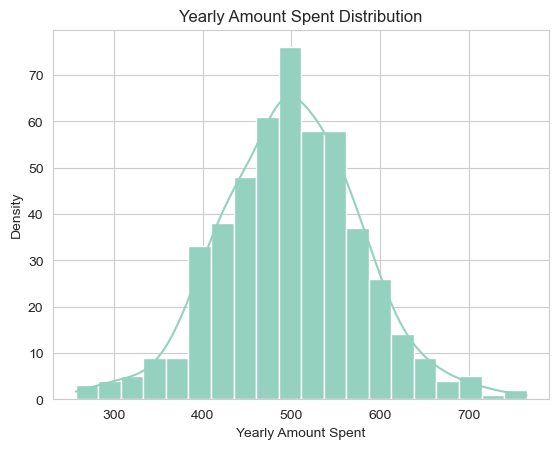

In [15]:
plot_histogram(customers, 'Yearly Amount Spent')

In [16]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

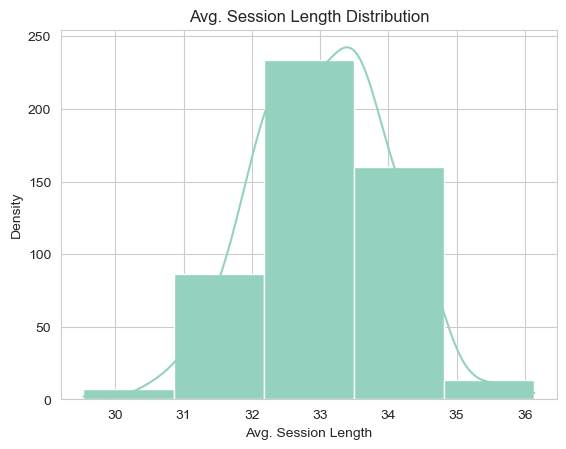

In [17]:
plot_histogram(customers, 'Avg. Session Length', bins = 5)

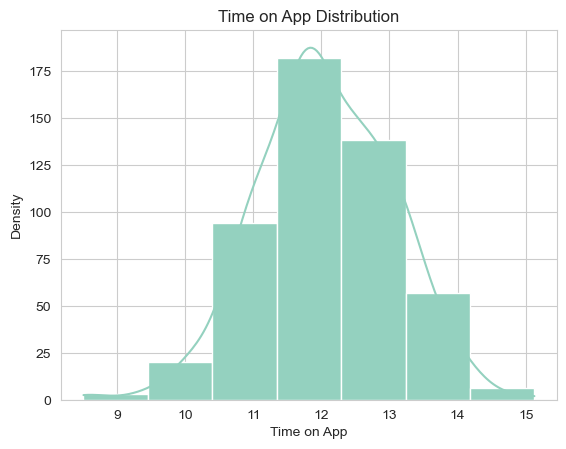

In [18]:
plot_histogram(customers, 'Time on App', bins = 7)

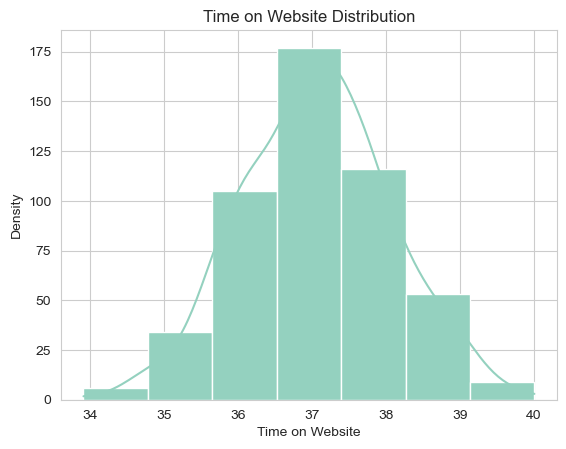

In [19]:
plot_histogram(customers, 'Time on Website', bins = 7)

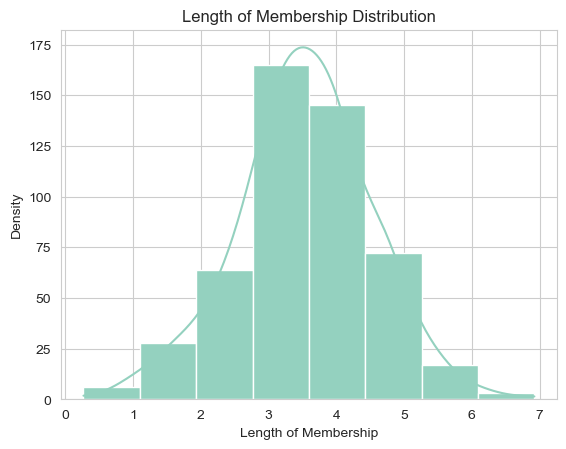

In [20]:
plot_histogram(customers, 'Length of Membership', bins = 8)

<a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Bivariate Analysis</h1>

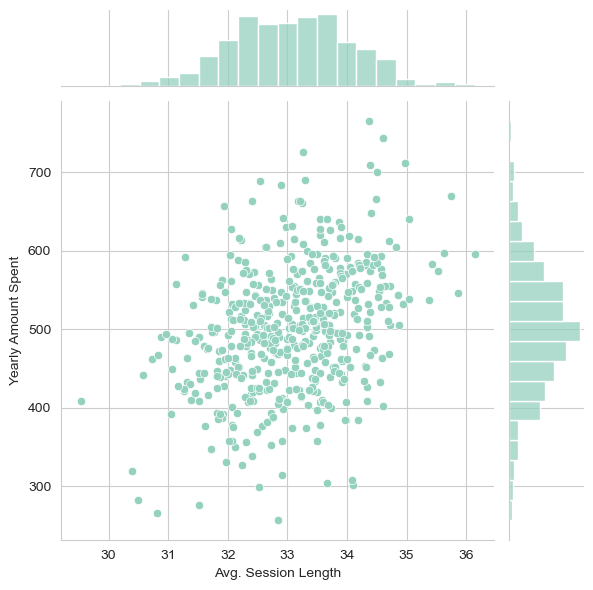

In [21]:
sns.jointplot(x='Avg. Session Length',y='Yearly Amount Spent',data=customers)
plt.show()

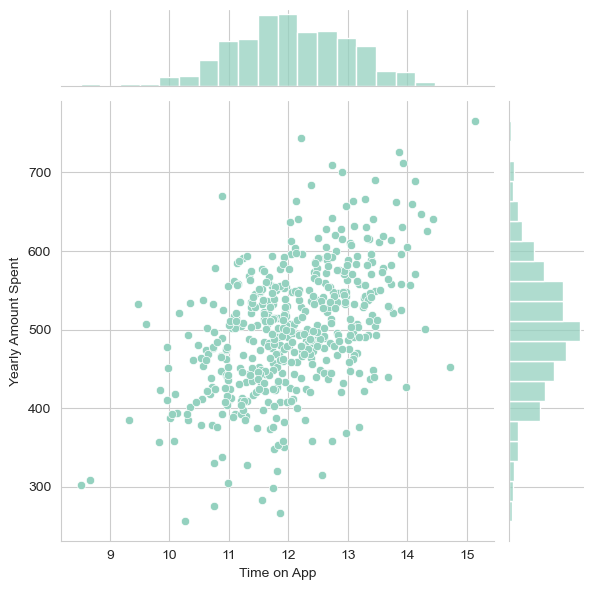

In [22]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)
plt.show()

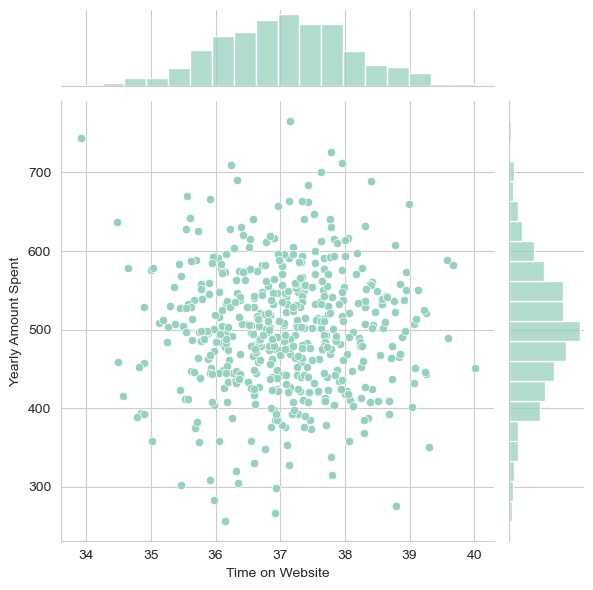

In [23]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)
plt.show()

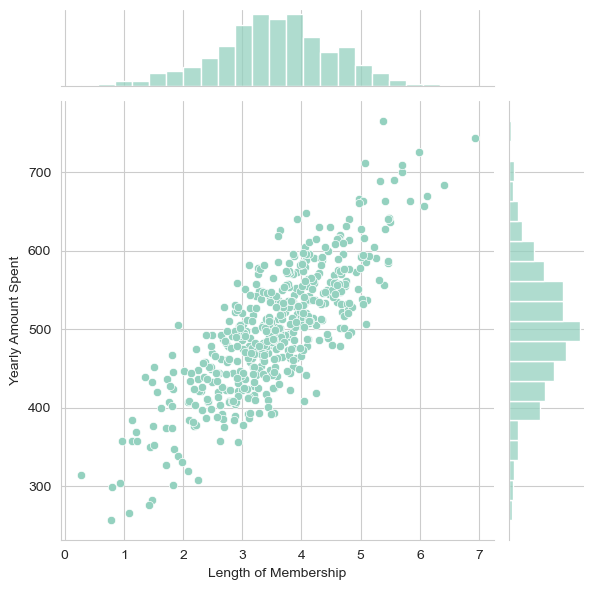

In [24]:
sns.jointplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.show()

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Correlation Map</h3>

In [25]:
customers_copy = customers

In [26]:
customers_copy = customers_copy.drop(['Email', 'Address', 'Avatar'], axis = 1)

In [27]:
df_corr = customers_copy.corr()
df_corr

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


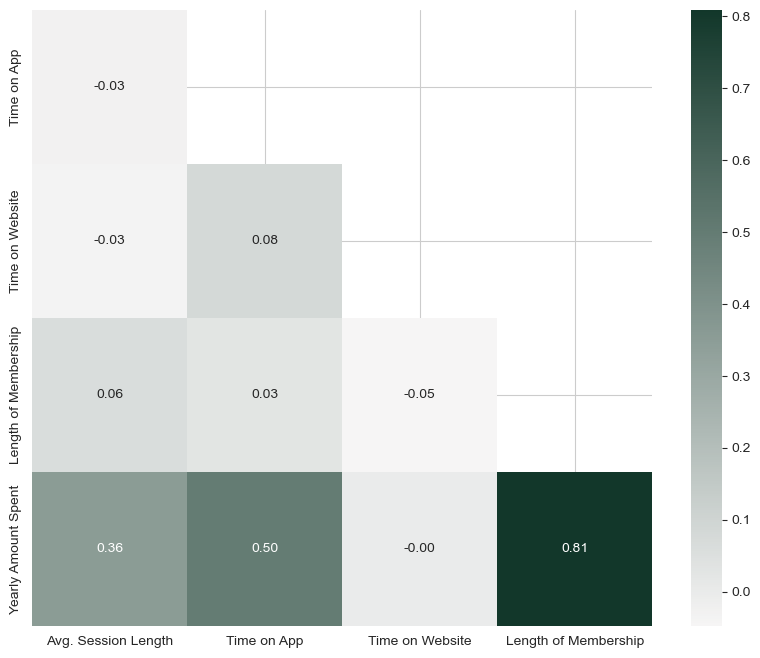

In [28]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize = (10,8))

mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

colors = ['#f6f5f5','#12372A']
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",cmap = colormap )

plt.show()

Based on the correlation plot, the **Lenght of Membership** looks to be the most correlated feature with Yearly Amount Spent.

C:\Users\user\anaconda5\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


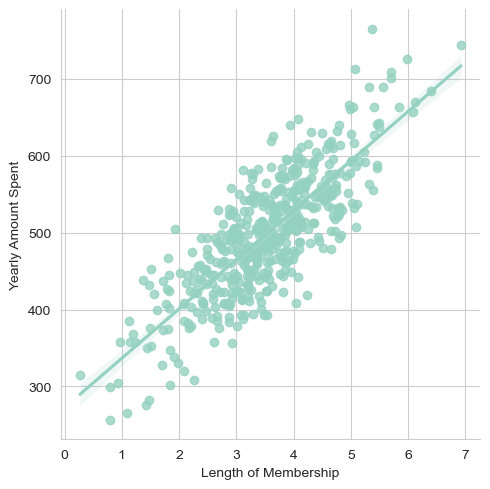

In [29]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.show()

<a id="2"></a>
<h1 style="background-color:#c5f6ef;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Modeling </h1>

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Importing Libraries</h3>

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Train Test Split</h3>

In [32]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]   # Features
y = customers['Yearly Amount Spent']                                                            # Target

# Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Data Scaling</h3>

In [33]:
num_feats = ['Avg. Session Length','Time on App','Time on Website','Length of Membership']

In [34]:
# Building the transformation pipeline
pipeline = ColumnTransformer([
    ("scaler", StandardScaler(), num_feats)
])

In [35]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test) 

In [36]:
X_train = pd.DataFrame(X_train, columns=num_feats)
X_test = pd.DataFrame(X_test, columns=num_feats)

In [37]:
X_train[0:3]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.818983,-0.021777,-2.467618,1.866915
1,0.874290,-0.037620,-0.288065,-0.800562
2,1.510599,0.121282,2.093227,0.085015


In [38]:
y_train[0:3]

5      637.102448
116    479.231093
45     549.860590
Name: Yearly Amount Spent, dtype: float64

In [39]:
X_test[0:3]

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,-0.992503,-1.694493,2.009010,-0.137475
1,-0.254042,0.765431,0.035791,0.268494
2,-1.628984,-1.939809,1.027404,0.644964


In [40]:
y_test[0:3]

361    401.033135
73     534.777188
374    418.602742
Name: Yearly Amount Spent, dtype: float64

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Models Development & Evaluation</h3>

In [51]:
def evaluate_regressor(name, regressor, params={}, X_train = X_train, y_train = y_train, X_test = X_test, y_test = y_test):
    # Perform grid search with cross-validation
    cv = GridSearchCV(regressor, params, cv=10)
    cv.fit(X_train, y_train)

    # Predict the target variable for the test set
    y_pred = cv.predict(X_test)

    # Compute and print regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Regressor: {name}')
    print(f'Best Parameters: {cv.best_params_}')
    print(f'Mean Absolute Error (MAE): {round(mae, 2)}')
    print(f'Mean Squared Error (MSE): {round(mse, 2)}')
    print(f'Root Mean Squared Error (RMSE): {round(rmse, 2)}')
    print(f'R-squared (R²): {round(r2, 2)}')

    # Plot true vs predicted values
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='green', linewidth=2)
    plt.title('True vs Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Linear Regression</h3>

Regressor: Linear Regression
Best Parameters: {}
Mean Absolute Error (MAE): 8.43
Mean Squared Error (MSE): 103.92
Root Mean Squared Error (RMSE): 10.19
R-squared (R²): 0.98


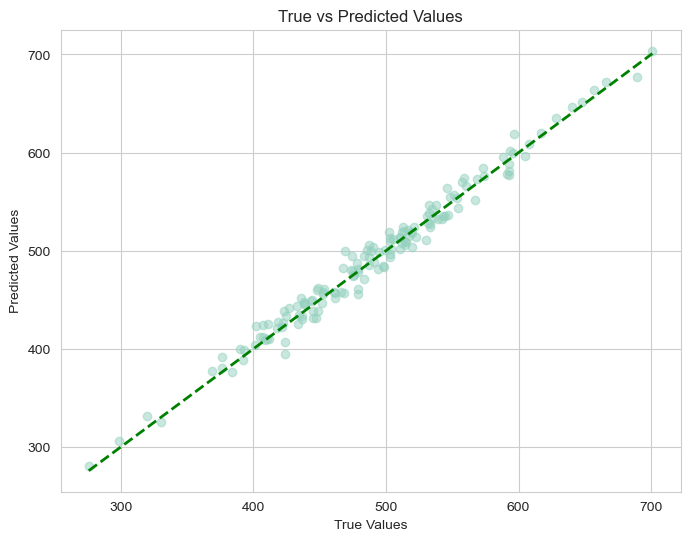

In [52]:
evaluate_regressor('Linear Regression', LinearRegression())

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Ridge Regression</h3>

Regressor: Ridge Regression
Best Parameters: {'alpha': 1.0, 'solver': 'saga'}
Mean Absolute Error (MAE): 8.42
Mean Squared Error (MSE): 103.95
Root Mean Squared Error (RMSE): 10.2
R-squared (R²): 0.98


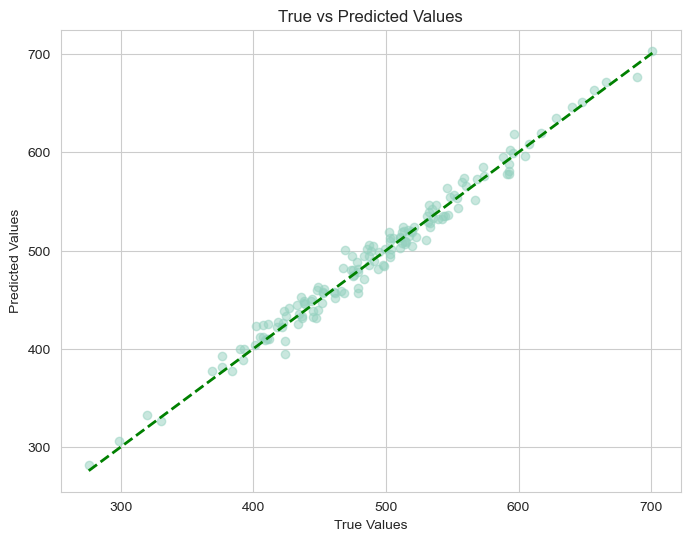

In [53]:
evaluate_regressor('Ridge Regression', Ridge(),
                   {'alpha': [0.1, 1.0, 10.0],
                    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']})

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Lasso Regression</h3>

Regressor: Lasso Regression
Best Parameters: {'alpha': 0.1, 'selection': 'cyclic'}
Mean Absolute Error (MAE): 8.42
Mean Squared Error (MSE): 103.94
Root Mean Squared Error (RMSE): 10.2
R-squared (R²): 0.98


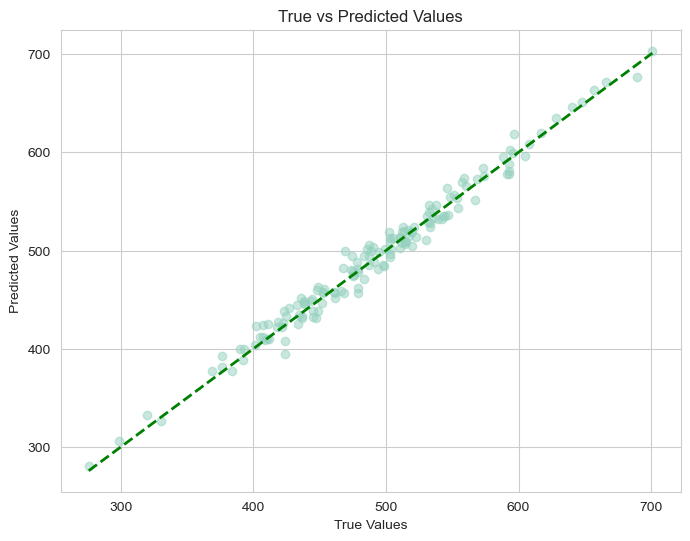

In [54]:
evaluate_regressor('Lasso Regression', Lasso(),
                   {'alpha': [0.1, 1.0, 10.0],
                    'selection': ['cyclic', 'random']})

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Support Vector Machine</h3>

Regressor: Support Vector Regression
Best Parameters: {'C': 10.0, 'gamma': 'scale', 'kernel': 'linear'}
Mean Absolute Error (MAE): 8.45
Mean Squared Error (MSE): 103.94
Root Mean Squared Error (RMSE): 10.2
R-squared (R²): 0.98


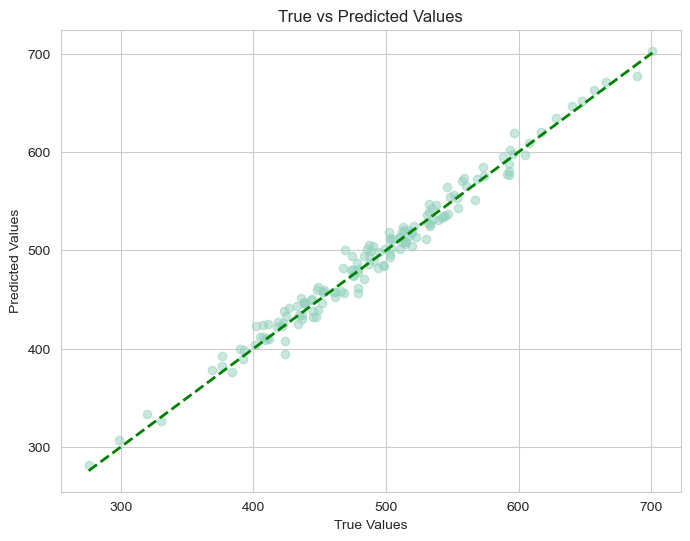

In [55]:
evaluate_regressor('Support Vector Regression', SVR(),
                   {'C': [0.1, 1.0, 10.0],
                    'kernel': ['linear', 'rbf'],
                    'gamma': ['scale', 'auto']})

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Decision Tree</h3>

Regressor: Decision Tree Regression
Best Parameters: {'max_depth': None}
Mean Absolute Error (MAE): 21.79
Mean Squared Error (MSE): 759.04
Root Mean Squared Error (RMSE): 27.55
R-squared (R²): 0.86


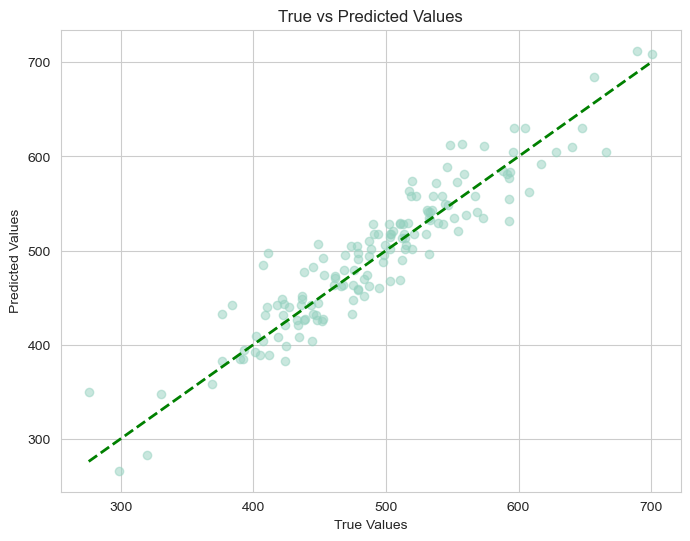

In [56]:
evaluate_regressor('Decision Tree Regression', DecisionTreeRegressor(),
                   {'max_depth': [None, 5, 10, 15]})

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Random Forest</h3>

Regressor: Random Forest Regression
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Mean Absolute Error (MAE): 13.55
Mean Squared Error (MSE): 286.5
Root Mean Squared Error (RMSE): 16.93
R-squared (R²): 0.95


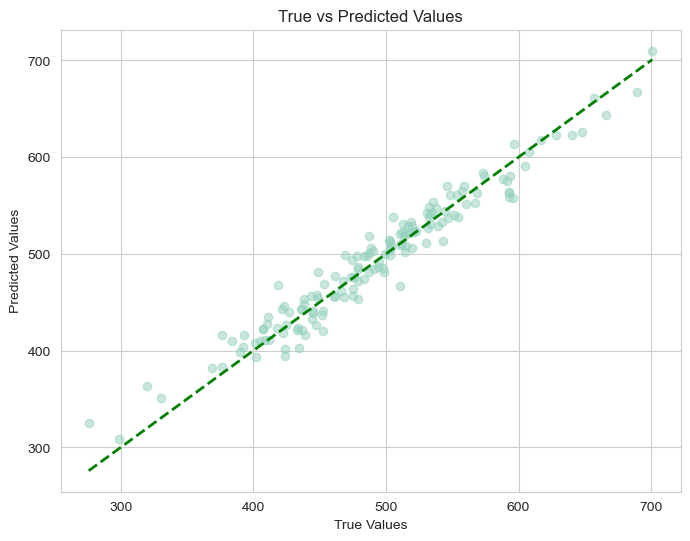

In [57]:
evaluate_regressor('Random Forest Regression', RandomForestRegressor(),
                   {'n_estimators': [50, 100, 200],
                    'max_depth': [None, 10, 20],
                    'min_samples_split': [2, 5, 10]})

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:180%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Residuals</h3>

We should have gotten a very good model with a good fit. Let's quickly explore more about the residuals to make sure everything was okay with our data. 

In [73]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

# Calculate residuals
residuals = y_test - predictions

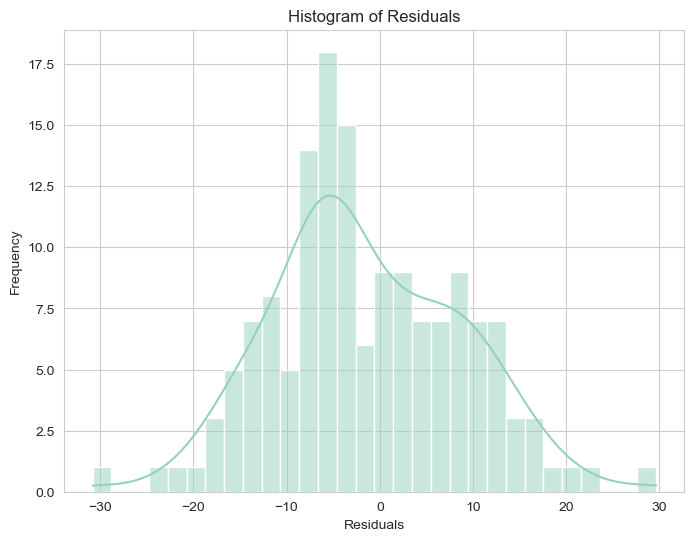

In [74]:
# Histogram of Residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

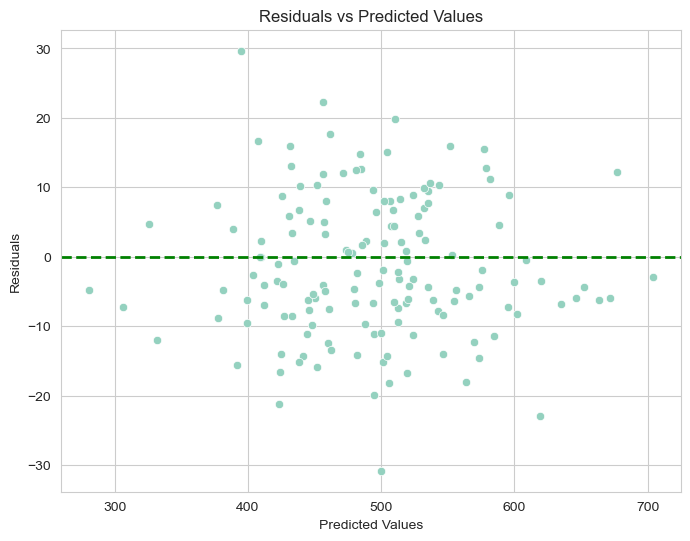

In [75]:
# Scatter plot of Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='g', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

<a id="2.1"></a>
<h3 style="background-color:#f8fefd; font-family:newtimeroman; font-size:200%; text-align:center; display:inline-block; padding: 10px; border-radius: 15px;">Interpreting Linear Regression Coefficients </h3>

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's interpret the coefficients of the linear regression model to get an idea.

In [76]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.468114
Time on App,38.743243
Time on Website,0.468548
Length of Membership,63.353471


**Interpreting the coefficients:**

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.47 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.74 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.47 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 63.35 total dollars spent**.

**Do we think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!